**Kullanılan Verilerin Açıklanması**

Bu veri seti, Binance'den elde edilen ve SQLite veritabanı formatında saklanan Bitcoin'in dakika bazlı fiyat hareketlerini içerir. ‘veritabanı’ isimli bu veritabanındaki ‘Data’ tablosu, 2023 yılı boyunca, her dakika için Bitcoin fiyat bilgileriyle zenginleştirilmiş detaylı işlem verilerini barındırmaktadır. Kayıtlar, her işlem dakikasının başlangıç ve bitiş fiyatlarıyla birlikte, o dakika içinde gerçekleştirilen en yüksek ve en düşük işlem fiyatlarını ve toplam işlem sayısını içermekte; böylelikle Bitcoin piyasasının o anki durumunu tam bir şekilde yansıtmaktadır. Her kaydın, işlemlerin gerçekleştiği dakikayı belirten bir zaman damgası (‘Açılış zamanı’) bulunmaktadır ve tüm işlemler ‘BTC/USDT’ para çifti üzerinden yapılmıştır.

2023 yılına ait bu veriler, zaman serisi analizi ve finansal tahmin modellemesi için değerli bir kaynaktır. Derin öğrenme ve makine öğrenimi uygulamalarında kullanılmak üzere hazırlanan bu veri seti, kısa vadeli fiyat hareketlerinin yakalanması ve modellenmesine imkan tanırken, uzun vadeli eğilimleri gözlemleme ve anlama fırsatı da sunmaktadır. Veri setinin yüksek sıklıktaki kayıtları, özellikle algoritmik ticaret ve yüksek frekanslı işlem (HFT) algoritmalarının geliştirilmesi için mükemmel bir temel oluşturur.

**Kullanılan Tekniğin Açıklanması**


LSTM (Long Short-Term Memory), özellikle zaman serisi verilerinin analizi ve sıralı verilerin işlenmesinde yaygın olarak kullanılan bir tür derin öğrenme modelidir. 1997 yılında Sepp Hochreiter ve Jürgen Schmidhuber tarafından geliştirilmiştir ve özellikle uzun süreli bağımlılıkları öğrenebilme yeteneği ile öne çıkar. Geleneksel yapay sinir ağlarından farklı olarak, LSTMLer, bilgiyi uzun süreler boyunca hatırlayabilme ve gerektiğinde bu bilgiyi kullanabilme kapasitesine sahiptirler.

Bir LSTM ağı, hafıza hücreleri adı verilen yapıları kullanır. Bu hücrelerin içinde bulunan kapılar (input, output ve forget kapıları), ağın hangi bilgileri saklayıp hangi bilgileri atacağına karar vermesine olanak tanır. Bu özellik, LSTM'nin bilgiyi uzun süreler boyunca korumasını ve gerektiğinde eski bilgilere dayalı kararlar almasını sağlar. Bu sayede, kısa süreli bellek problemi olan ve sadece yakın geçmişteki bilgilere dayanarak tahminler yapabilen geleneksel yapay sinir ağlarının aksine, LSTM'ler uzun süre önceki olayları hatırlayabilir ve bu olayların etkilerini anlayabilir.

LSTM ağları, finansal zaman serisi tahminleri, doğal dil işleme, konuşma tanıma ve müzik besteleme gibi birçok alanda başarıyla uygulanmıştır. Özellikle Bitcoin fiyat tahmini gibi finansal verilerin analizi konusunda, piyasadaki gelişmelerin ve fiyat dalgalanmalarının zaman içindeki etkilerini anlamak için idealdirler. LSTM'lerin bu yeteneği, piyasa davranışlarının karmaşık ve gecikmeli doğasını modellenebilir kılarak yatırımcılara ve analistlere gelecekteki eğilimleri ve fiyat hareketlerini tahmin etmeleri konusunda yardımcı olur.

***Kod Açıklamaları***


Bu kod parçası, derin öğrenme modelimi oluşturmak için kullandığım başlangıç aşamasını temsil ediyor. Numpy ve pandas, veri işleme ve analizi için temel taşlarım; bu kütüphaneler olmadan veri setlerimi uygun şekilde manipüle etmek ve hazırlamak neredeyse imkansız. Veri setimin özelliklerini ölçeklendirmek için sklearn'den MinMaxScaler'ı kullandım, çünkü modelimin daha iyi performans göstermesini sağlayacak şekilde verilerin aynı aralıkta olmasını istiyorum. Keras, modelimi oluştururken tercih ettiğim bir kütüphane, çünkü kullanımı kolay ve esnek. Sequential model yapısını kullanarak, katmanları sırayla ekledim: önce LSTM katmanı, ardından veri setimdeki özelliklere göre ayarladığım birkaç Dense katman. Modelin optimizasyonu için Adam optimizörünü tercih ettim, çünkü genel olarak iyi sonuçlar verdiğini ve hızlı olduğunu okumuştum. Bu kod parçası, projemdeki ilk adımları atarken üzerinde düşündüğüm ve karar verdiğim temel bileşenleri içeriyor.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam

Bu fonksiyon, tez çalışmam sırasında veritabanından veri çekmek için geliştirdiğim bir yapı. Veritabanı yönetimi konusundaki bilgilerimi pratiğe dökmek adına, sqlite3 kütüphanesini kullanarak bir veritabanı bağlantısı oluşturdum. Fonksiyon, parametre olarak aldığı veritabanı adı ve tablo ismini kullanarak, ilgili tablodan tüm verileri çeken bir SQL sorgusu gerçekleştiriyor. Pandas'ın `read_sql` fonksiyonunu kullanarak, sorgu sonucunu doğrudan bir DataFrame'e dönüştürüyorum, bu da verileri analiz etmeye ve işlemeye hazır hale getiriyor. Bağlantıyı her sorgudan sonra kapatmak, kaynak yönetimi açısından önemli bir adım. Bu fonksiyon, tezimdeki veri işleme sürecinin temel taşlarından biri haline geldi ve bana SQLite veritabanları ile çalışırken büyük bir esneklik sağladı.

In [2]:
def load_data(database_name, table_name):
    import sqlite3
    conn = sqlite3.connect(database_name)
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql(query, conn)
    conn.close()
    return df


Bu fonksiyon, Bitcoin fiyatını tahmin etmek için LSTM modeli kurarken kullandığım veri ön işleme adımını temsil ediyor. Öncelikle, veri setindeki 'Açılış Fiyatı' ve 'Kapanış Fiyatı' sütunlarını, modelimin işleyebileceği float türüne dönüştürdüm. Bu çalışmada, özellikle Bitcoin'in kapanış fiyatlarını kullanarak zaman serisi tahminleri yapmayı hedefliyorum, çünkü bu fiyatlar, piyasanın o gün için son durumunu yansıtıyor ve yatırımcılar için kritik bir öneme sahip.

Verileri, LSTM modelimin daha iyi öğrenebilmesi için 0 ile 1 arasında ölçeklendirdim. Bu ölçeklendirme işlemi, modelin eğitim sürecini hızlandırıyor ve daha iyi performans göstermesini sağlıyor. Daha sonra, veri setinin %80'ini eğitim seti olarak ayırdım ve kalan %20'sini modelin genelleme kabiliyetini test etmek için kullanacağım test seti olarak belirledim. Bu ayırma işlemi, modelimin gerçek dünya verileri üzerinde nasıl performans göstereceğine dair sağlam bir fikir edinmemi sağlıyor.

In [3]:

# Verilerin önişlenmesi
def preprocess_data(df):
    df['Açılış Fiyatı'] = df['Açılış Fiyatı'].astype(float)
    df['Kapanış Fiyatı'] = df['Kapanış Fiyatı'].astype(float)
    
    # Sadece kapanış fiyatlarını kullanarak basit bir model kuruyoruz
    all_closing_prices = df['Kapanış Fiyatı'].values.reshape(-1,1)
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    all_closing_prices_scaled = scaler.fit_transform(all_closing_prices)
    
    # Eğitim ve test setlerini belirlemek
    train_size = int(len(all_closing_prices_scaled) * 0.80)
    test_size = len(all_closing_prices_scaled) - train_size
    train, test = all_closing_prices_scaled[0:train_size,:], all_closing_prices_scaled[train_size:len(all_closing_prices_scaled),:]
    
    return train, test, scaler

Bu fonksiyon, Bitcoin fiyat tahmini projemde LSTM modelimi eğitmek için kullanacağım veri setlerini oluşturma sürecini temsil ediyor. Temelde, modelime belirli bir zaman dilimindeki geçmiş verileri göstererek, sonraki adımda fiyatın ne olacağını tahmin etmesi için eğitiyorum. Bu yaklaşım, zaman serisi tahminlerinde oldukça yaygın bir yöntem.

`look_back` parametresi, modelimin geçmişte ne kadar geriye bakacağını belirliyor. Örneğin, `look_back=10` ise, model son 10 dakikalık veriyi kullanarak bir sonraki adımı tahmin etmeye çalışacak. Bu parametre, modelin karmaşıklığını ve öğrenmesi gereken desenlerin boyutunu doğrudan etkiliyor.

Fonksiyon içerisinde, her bir adım için, belirlenen `look_back` miktarına göre, geçmişteki veri noktalarını (`X`) ve bu veri noktalarını takiben gelen fiyatı (`Y`) saklıyorum. Sonuçta, modelimin eğitimi için kullanılacak `X` ve `Y` dizilerini oluşturmuş oluyorum. Bu diziler, modelin, geçmiş verileri temel alarak gelecekteki fiyat hareketlerini öğrenmesi ve tahmin etmesi için kritik öneme sahip.

Bu yaklaşım, Bitcoin fiyatlarının zaman içindeki hareketlerini anlamak ve gelecekteki değişimleri tahmin etmek için kullanıyorum. LSTM modelimin zaman içindeki bağlantıları ve desenleri öğrenebilmesi için bu şekilde yapılandırılmış veri setlerine ihtiyacı var. Bu yöntem, finansal zaman serilerinin tahmin edilmesinde sıkça başvurulan bir tekniktir ve projemdeki temel adımlardan birini oluşturuyor.

In [4]:
# Veri setlerini oluşturma
def create_dataset(dataset, look_back=10):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

Bu fonksiyon, Bitcoin fiyat tahmini için LSTM (Long Short-Term Memory) modelimi oluşturma sürecini gösteriyor. LSTM, özellikle zaman serisi verilerindeki uzun süreli bağımlılıkları öğrenmede etkili olan bir tür RNN (Recurrent Neural Network)'dir. Fonksiyonun temel amacı, veri setindeki geçmiş bilgileri kullanarak gelecekteki fiyat hareketlerini tahmin edebilecek bir model kurmak.

`look_back` parametresi, modelin her adımda ne kadar geçmişe bakacağını belirler. Bu, modelin girdi şeklini doğrudan etkiler ve burada modelime, her seferinde belirli bir miktarda geçmiş veri noktası sağlayarak, gelecek noktayı tahmin etmesi için eğitiyorum.

Model yapısına gelince, iki LSTM katmanı kullanıyorum. İlk LSTM katmanı, `return_sequences=True` ayarı sayesinde, ikinci LSTM katmanına bir dizi çıktı gönderiyor. Bu, katmanlar arası daha zengin bilgi akışını sağlıyor ve modelin daha karmaşık öğrenme desenlerini yakalamasına olanak tanıyor. Her iki LSTM katmanı da 50 birimden oluşuyor, bu da modelin karmaşıklığını ve öğrenebileceği desenlerin detayını belirliyor.

Modelin son katmanı olan Dense katmanı, LSTM katmanlarından gelen bilgileri kullanarak nihai tahminimi yapar. Burada sadece bir nöron kullanıyorum çünkü amacım, belirli bir zaman diliminden sonra beklenen Bitcoin fiyatını tek bir değer olarak tahmin etmek.

Modelin derlenmesi aşamasında, optimizasyon algoritması olarak 'adam' seçiyorum ve kayıp fonksiyonu olarak 'mean_squared_error' kullanıyorum. Bu seçimler, modelin eğitim sürecindeki performansını ve tahmin başarısını optimize etmeye yönelik.

Sonuç olarak, bu fonksiyon, Bitcoin fiyat tahminim için kritik bir temel oluşturuyor. Modelin yapısı ve ayarları, projemin hedeflerine ve kullanılan veri setinin özelliklerine göre özenle seçildi. Bu model, tez çalışmamın önemli bir parçası olarak, zaman serisi tahminlerinde LSTM'nin etkinliğini ve uygulanabilirliğini araştırmama yardımcı oluyor.

In [5]:
# LSTM Modelini oluşturma
def build_model(look_back):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Bu kod bloğu, baştan sona bir Bitcoin fiyat tahmin modeli kurma sürecini gösteriyor. İlk olarak, `load_data` fonksiyonu ile belirli bir veritabanından verileri yüklüyorum. Bu adım, projem için gerekli ham verileri toplamamı sağlıyor. Ardından, `preprocess_data` fonksiyonu ile verileri önişleyerek modelimin daha etkili bir şekilde öğrenmesini sağlayacak formata getiriyorum.

`look_back` parametresini 10 olarak belirleyerek, modelimin her adımda son 10 zaman dilimine bakmasını istiyorum. Bu, modelin daha uzun süreli bağımlılıkları ve trendleri yakalayabilmesi için önemli. Ardından, eğitim ve test veri setlerimi oluşturuyor ve LSTM modelime uygun hale getirmek için bu verileri yeniden şekillendiriyorum.

Model kurulumu aşamasında, `build_model` fonksiyonu ile bir LSTM modeli oluşturuyor ve `look_back` parametresi ile uyumlu bir yapıda olduğundan emin oluyorum. Modeli, belirlenen eğitim veri seti üzerinde 100 epoch boyunca eğitiyorum. Bu, modelimin veri setindeki desenleri ve ilişkileri öğrenmesi için yeterli bir süre.

Son olarak, eğitim ve test veri setleri üzerinde tahminlerde bulunuyor ve bu tahminlerin gerçek değerlerle olan ilişkisini değerlendiriyorum. `scaler.inverse_transform` işlemi ile ölçeklendirmeyi geri alarak, tahminlerimin ve gerçek değerlerin anlamlı ve karşılaştırılabilir olmasını sağlıyorum. Bu süreç, modelimin performansını gerçek dünya koşullarında değerlendirmek için kritik öneme sahip.

Bu kod bloğu, derin öğrenme tabanlı bir zaman serisi tahmin modelinin nasıl kurulacağı ve eğitileceği konusunda temel bir rehber niteliğindedir. Burada yapılan her adım, modelin başarısını doğrudan etkileyebilecek önemli kararlardır ve bu süreçte yapılan optimizasyonlar, tahmin performansını önemli ölçüde iyileştirebilir.

In [6]:
# Veritabanı dosyasını ve tablo ismini ekleme
database_name = 'veritabani.db'
table_name = 'Data'

# Verileri yükleme
df = load_data(database_name, table_name)

# Verilerin önişlenmesi
train, test, scaler = preprocess_data(df)

# Veri setlerinin oluşturulması
look_back = 10
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Verileri yeniden şekillendirmesi
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Modeli oluşturulması ve eğitimi
model = build_model(look_back)
model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=2)

# Tahminleri yapın-lması ve ölçeklendirmenin geri alınması
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

c:\Users\Justinyen\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
12414/12414 - 110s - 9ms/step - loss: 7.1674e-05
Epoch 2/100
12414/12414 - 107s - 9ms/step - loss: 2.3590e-06
Epoch 3/100
12414/12414 - 107s - 9ms/step - loss: 1.4807e-06
Epoch 4/100
12414/12414 - 104s - 8ms/step - loss: 1.0069e-06
Epoch 5/100
12414/12414 - 88s - 7ms/step - loss: 8.3385e-07
Epoch 6/100
12414/12414 - 84s - 7ms/step - loss: 7.6047e-07
Epoch 7/100
12414/12414 - 84s - 7ms/step - loss: 7.0522e-07
Epoch 8/100
12414/12414 - 84s - 7ms/step - loss: 6.8231e-07
Epoch 9/100
12414/12414 - 85s - 7ms/step - loss: 6.4336e-07
Epoch 10/100
12414/12414 - 85s - 7ms/step - loss: 6.2392e-07
Epoch 11/100
12414/12414 - 85s - 7ms/step - loss: 6.0387e-07
Epoch 12/100
12414/12414 - 85s - 7ms/step - loss: 6.0249e-07
Epoch 13/100
12414/12414 - 86s - 7ms/step - loss: 5.6859e-07
Epoch 14/100
12414/12414 - 84s - 7ms/step - loss: 5.6247e-07
Epoch 15/100
12414/12414 - 85s - 7ms/step - loss: 5.5905e-07
Epoch 16/100
12414/12414 - 84s - 7ms/step - loss: 5.4172e-07
Epoch 17/100
12414/12414 - 84

Çıktıyı incelersek bir LSTM modelinin eğitim sürecini göstermektedir. Eğitim, toplam 100 epoch süresince devam etmiş ve her epoch için modelin performansı loss (kayıp) değeri ile ölçülmüştür. Loss değeri, modelin tahminlerinin gerçek değerlerden ne kadar sapma gösterdiğinin bir göstergesidir ve genellikle geri yayılım (backpropagation) sürecinde model ağırlıklarının ne kadar güncelleneceğini belirler.

İlk epoch'ta loss değeri `7.1674e-05` olarak kaydedilmiştir. Bu, modelin henüz iyi bir performans sergilemediğini, ancak eğitim sürecinin başında olduğunu gösterir. İkinci epoch'tan itibaren loss değeri hızla düşmüş ve `2.3590e-06`'ya kadar inmiştir. Bu, modelin hızla öğrendiğini ve ağırlıklarını verilere uygun şekilde ayarladığını gösterir.

Eğitim devam ettikçe, loss değerlerindeki düşüş trendi devam etmiş ve değerler `1e-06` civarına ve daha altına inmiştir. Bu, modelin veri üzerindeki karmaşıklığı ve desenleri gitgide daha iyi öğrendiğini ve tahminlerinin gerçek değerlere daha da yaklaştığını gösterir. Ancak loss değerlerindeki azalışın belirli bir noktadan sonra yavaşlaması, modelin eğitim seti üzerindeki öğrenme kapasitesinin bir sınırına yaklaştığını işaret edebilir.

Eğitim sürecinin sonlarına doğru, loss değerleri daha stabil bir seviyede kalmakta ve `4e-07` civarında değişkenlik göstermektedir. Bu, modelin eğitim verilerine aşırı uydurma (overfitting) yapmadan önce eğitim sürecinin doğru bir noktada stabilize olduğunu gösterebilir.

Eğitim sürecinin her epoch'unun süresi de (örneğin, ilk epoch için 110 saniye) verilmiştir ve bu süre genellikle modelin karmaşıklığı, eğitim setinin büyüklüğü ve kullanılan hesaplama kaynaklarına bağlı olarak değişkenlik gösterir. Her adımın ne kadar sürdüğü (örneğin, `9ms/step`), modelin her bir eğitim adımını ne kadar hızlı işlediğini gösterir ve bu da eğitim sürecinin verimliliği hakkında fikir verir.

Sonuç olarak, bu çıktılar LSTM modelinin eğitim sürecinin genel bir özeti olarak yorumlanabilir ve modelin eğitim süresince iyi bir öğrenme ve iyileşme gösterdiğini, loss değerlerinde düzenli bir azalış olduğunu ve eğitim sürecinin verimli bir şekilde ilerlediğini gösterir. 

Aşağıdaki kod satırı, eğitilen LSTM modelini ‘my_model.keras’ adlı bir dosyaya kaydeder. `model.save()` fonksiyonu, Keras kütüphanesinin bir özelliği olup, modelin mimarisini, ağırlıklarını, eğitim konfigürasyonunu (loss, optimizer) ve hatta optimizer'in durumunu dahi kaydeder. Bu, modelin tam olarak aynı durumda daha sonra yüklenebilmesi ve kullanılabilmesi için gereklidir.

Kaydedilen model, daha sonraki bir tarihte yüklenebilir ve kullanıcı bu modeli doğrudan tahmin yapmak, modeli ek verilerle daha fazla eğitmek veya modeli analiz etmek için kullanabilir. Bu işlem, eğitim sürecinin oldukça zaman alıcı olabileceği derin öğrenme modelleri için özellikle faydalıdır çünkü modeli tekrar eğitimden geçirmek yerine hızlı bir şekilde yükleyip kullanmaya başlamak mümkündür.

Ayrıca, bu yaklaşım modelin paylaşılmasını ve farklı sistemlerde veya uygulamalarda kolaylıkla tekrar kullanılmasını sağlar. Bu sayede, modelin ürettiği sonuçların tekrarlanabilirliği ve geçerliliği de güvence altına alınır. Model dosyası, özellikle büyük ve karmaşık modellerde olduğu gibi, veri bilimcileri ve mühendisleri arasında kolayca paylaşılabilen standart bir format halini alır.


Eğitilen ve kaydedilen modeli tekrar kullanmak için, Keras kütüphanesindeki load_model fonksiyonunu kullanabiliriz. Bu fonksiyon, kayıtlı model dosyasını okur ve modelin tam bir kopyasını oluşturur. Böylece, model üzerinde daha önce yapılan tüm eğitimler korunur ve model hemen kullanıma hazır hale gelir. Bu süreç, modelin eğitimini tekrar etmek yerine zaman ve kaynak tasarrufu sağlar. Modeli yükledikten sonra, tahminler yapmak için predict metodunu kullanabiliriz.

In [13]:
model.save('my_model.keras')

İlk olarak, eğitim ve test setleri üzerinde Mean Squared Error (MSE) metriği ile hata hesaplamaları yapılır. MSE, modelin tahmin ettiği fiyatlar ile gerçek fiyatlar arasındaki farkların karelerinin ortalaması alınarak hesaplanır ve modelin performansının ne kadar iyi olduğunu anlamak için yaygın bir ölçüttür. Düşük bir MSE değeri, modelin verileri iyi bir şekilde öğrendiğini ve doğru tahminlerde bulunduğunu gösterir. 

Kodun ikinci kısmında, gerçek ve tahmin edilen fiyatlar iki ayrı grafik üzerinde gösterilir. Sol taraftaki grafik, eğitim seti verilerine göre modelin ne kadar iyi performans gösterdiğini görselleştirirken, sağ taraftaki grafik ise modelin test seti üzerinde ne kadar başarılı olduğunu gösterir. Grafiklerdeki ‘Gerçek Fiyatlar’ eğrisi gerçek Bitcoin fiyatlarını, ‘Tahmin Edilen Fiyatlar’ eğrisi ise LSTM modeli tarafından yapılan tahminleri temsil eder. Görselleştirme, modelin veri setinin farklı bölümlerindeki performansını gözlemleyebilmek ve öğrendikleri ile genelleme yapabilme yeteneğini anlamak için değerli bir araçtır. Bu grafikler, modelin farklı zaman aralıklarında nasıl bir performans sergilediğini açık bir şekilde ortaya koymakla kalmaz, aynı zamanda aşırı uyum (overfitting) ya da yetersiz uyum (underfitting) gibi potansiyel sorunları da tespit etmek için kullanılabilir.

Eğitim MSE: 331.1201925382067
Test MSE: 102672.81494312224


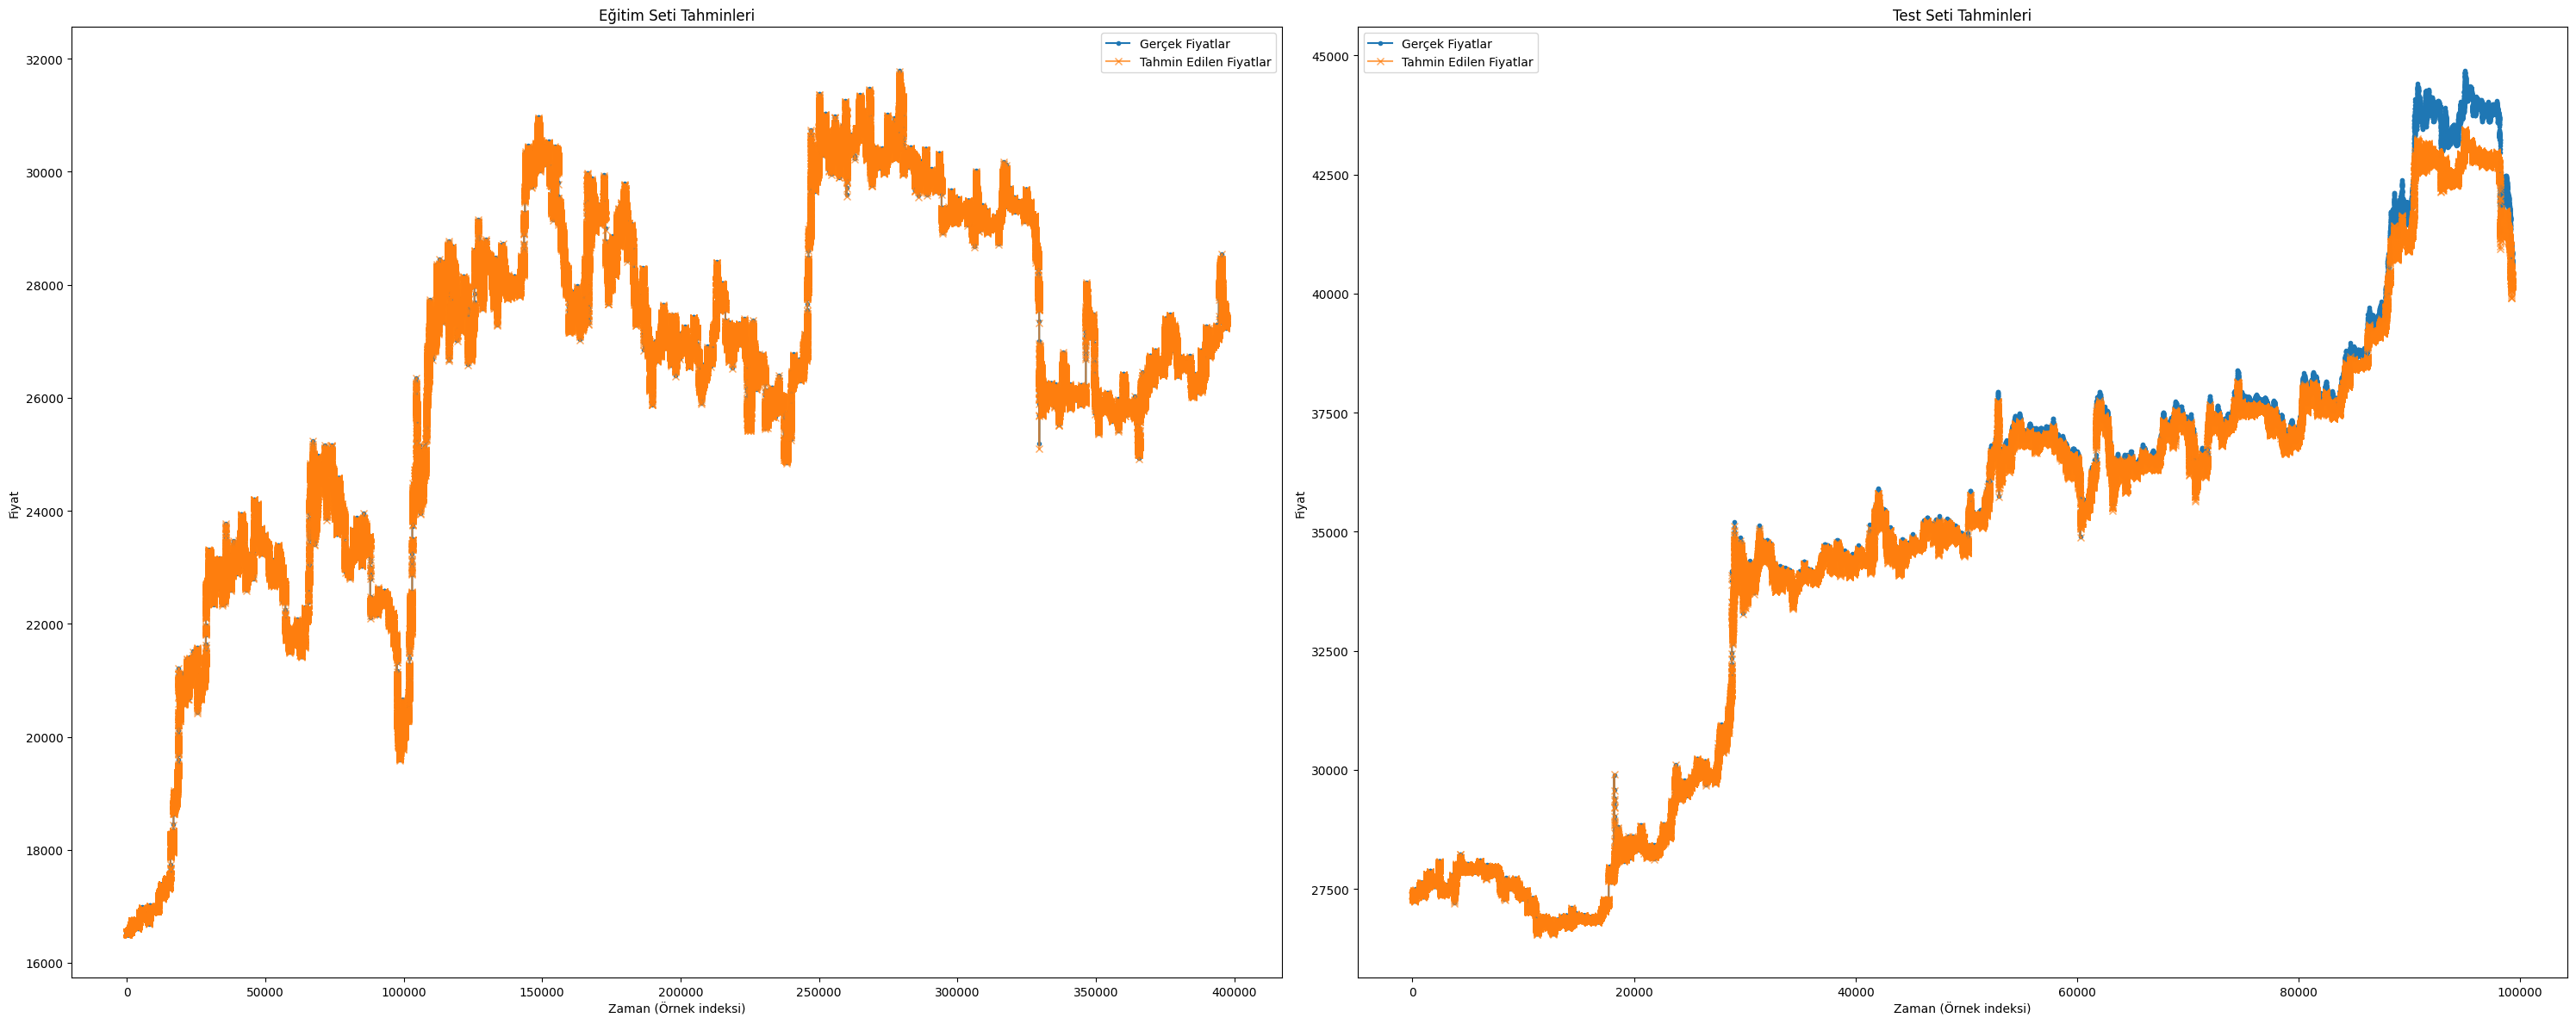

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Eğitim ve test hatalarını (MSE) hesaplayalım
train_mse = mean_squared_error(Y_train[0], train_predict[:,0])
test_mse = mean_squared_error(Y_test[0], test_predict[:,0])

print(f'Eğitim MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

# Gerçek ve tahmin edilen fiyatları grafik üzerinde gösterelim
plt.figure(figsize=(30, 12))

# Eğitim seti tahminlerini gösterelim.
plt.subplot(1, 2, 1)
plt.plot(Y_train[0], label='Gerçek Fiyatlar', marker='.')
plt.plot(train_predict[:,0], label='Tahmin Edilen Fiyatlar', alpha=0.7, marker='x')
plt.title('Eğitim Seti Tahminleri')
plt.xlabel('Zaman (Örnek indeksi)')
plt.ylabel('Fiyat')
plt.legend()

# Test seti tahminlerini gösterelim.
plt.subplot(1, 2, 2)
plt.plot(Y_test[0], label='Gerçek Fiyatlar', marker='.')
plt.plot(test_predict[:,0], label='Tahmin Edilen Fiyatlar', alpha=0.7, marker='x')
plt.title('Test Seti Tahminleri')
plt.xlabel('Zaman (Örnek indeksi)')
plt.ylabel('Fiyat')
plt.legend()

plt.tight_layout()
plt.show()


Grafikte gösterilen sonuçlara bakarak, iki farklı veri seti için LSTM modelinin tahmin başarısını değerlendirebiliriz. Sol taraftaki "Eğitim Seti Tahminleri" grafiği, eğitim sırasında modelin gerçek fiyatlarla ne kadar uyum sağladığını gösteriyor. Eğitim setinde, modelin gerçek fiyatları oldukça yakından takip ettiğini ve eğitim MSE değerinin 331.12 olduğunu görüyoruz. Bu, modelin eğitim verilerini nispeten iyi öğrendiğini gösteriyor, ancak tahminlerin tam olarak gerçek değerlerle örtüşmediğini de gözlemliyoruz.

Öte yandan, sağdaki "Test Seti Tahminleri" grafiğinde, modelin test seti üzerinde gerçekleştirdiği tahminlerin gerçek değerlere kıyasla daha fazla sapma gösterdiğini ve bu da test MSE değerinin 102672.81 olarak belirlendiğini görüyoruz. Bu yüksek hata değeri, modelin görmediği veriler üzerinde daha az başarılı olduğunu ve muhtemelen aşırı uydurma (overfitting) sorunuyla karşı karşıya olduğunu gösteriyor. Aşırı uydurma, modelin eğitim verilerine aşırı derecede uyum sağlaması ve genellemeyi başaramaması durumudur.

Eğitim seti için modelin düşük hata değerleri alması, modelin eğitim verilerini iyi bir şekilde içselleştirdiğini gösterirken; test seti için yüksek hata değerleri, modelin genelleme yeteneğinin zayıf olduğunu ve gelecekteki fiyat hareketlerini tahmin etmede güvenilir olmayabileceğini gösterir. Gerçek ve tahmin edilen fiyatların zaman serisi grafiğindeki uyum seviyesi, bu farklılığın görsel bir kanıtıdır.

Modelin genelleme kabiliyetini artırmak için, veri setindeki farklılık ve karmaşıklığı daha iyi yakalayabilecek şekilde model parametrelerinin ayarlanması, daha fazla veri ile eğitim yapılması veya farklı model mimarilerinin denemesi gibi yöntemlere başvurulabilir. Ayrıca, modelin aşırı uydurmasını önlemek için düzenlileştirme teknikleri uygulanabilir veya eğitim sürecinde erken durdurma (early stopping) gibi yöntemler kullanılabilir.